<a href="https://colab.research.google.com/github/AgiletechDev/GrainQ/blob/main/Granadilla_RCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
import matplotlib.pyplot as plt

#Descarga y extracción del set de datos

In [16]:
#from google.colab import drive
#drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
carpeta_base = '/content/drive/MyDrive/granadilla_cv/'
carpeta_entrenamiento = os.path.join(carpeta_base, 'train')
carpeta_validacion = os.path.join(carpeta_base, 'validation')

In [18]:
carp_entren_calidad_1 = os.path.join(carpeta_entrenamiento, 'calidad_1')  # imagenes de calidad_1 para pruebas
carpeta_entren_calidad_2 = os.path.join(carpeta_entrenamiento, 'calidad_2')  # imagenes de calidad_2 para pruebas
carpeta_entren_extra = os.path.join(carpeta_entrenamiento, 'extra') # imagenes de extra para pruebas

carpeta_val_calidad_1 = os.path.join(carpeta_validacion, 'calidad_1')  # imagenes de gatos para validacion
carpeta_val_calidad_2 = os.path.join(carpeta_validacion, 'calidad_2')  # imagenes de perros para validacion
carpeta_val_extra = os.path.join(carpeta_validacion, 'extra')  # imagenes de perros para validacion

In [19]:
num_calidad_1_entren = len(os.listdir(carp_entren_calidad_1))
num_calidad_2_entren = len(os.listdir(carpeta_entren_calidad_2))
num_extra_entren = len(os.listdir(carpeta_entren_extra))

num_calidad_1_val = len(os.listdir(carpeta_val_calidad_1))
num_calidad_2_val = len(os.listdir(carpeta_val_calidad_2))
num_extra_val = len(os.listdir(carpeta_val_extra))

total_entrenamiento = num_calidad_1_entren + num_calidad_2_entren + num_extra_entren
total_val = num_calidad_1_val + num_calidad_2_val + num_extra_val

In [20]:
TAMANO_LOTE = 100
TAMANO_IMG = 150

In [21]:
#Aumento de datos (escala, rotacion, blabla)
print("Realizando aumento de datos")
image_gen_entrenamiento = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

Realizando aumento de datos


In [22]:
#Generacion de datos de entrenamiento 
data_gen_entrenamiento = image_gen_entrenamiento.flow_from_directory(batch_size=TAMANO_LOTE,
                                                     directory=carpeta_entrenamiento,
                                                     shuffle=True,
                                                     target_size=(TAMANO_IMG,TAMANO_IMG),
                                                     class_mode='binary')

#Generacion de datos de validacion
image_gen_val = ImageDataGenerator(rescale=1./255)

data_gen_validacion = image_gen_val.flow_from_directory(batch_size=TAMANO_LOTE,
                                                 directory=carpeta_validacion,
                                                 target_size=(TAMANO_IMG, TAMANO_IMG),
                                                 class_mode='binary')

Found 600 images belonging to 3 classes.
Found 150 images belonging to 3 classes.


In [23]:
#Modelo!
modelo = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(units=3, activation='softmax')
])

In [27]:
#Compilación
modelo.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [28]:
print("Entrenando modelo...");
epocas=100
historial = modelo.fit(
    data_gen_entrenamiento,
    steps_per_epoch=int(np.ceil(total_entrenamiento / float(TAMANO_LOTE))),
    epochs=epocas,
    validation_data=data_gen_validacion,
    validation_steps=int(np.ceil(total_val / float(TAMANO_LOTE)))
)

Entrenando modelo...
Epoch 1/100
6/6 [==============================] - 30s 5s/step - loss: 1.0866 - accuracy: 0.3533 - val_loss: 1.0594 - val_accuracy: 0.4533
Epoch 2/100
6/6 [==============================] - 33s 6s/step - loss: 1.0578 - accuracy: 0.4417 - val_loss: 1.0255 - val_accuracy: 0.3867
Epoch 3/100
6/6 [==============================] - 26s 4s/step - loss: 1.0227 - accuracy: 0.4650 - val_loss: 1.0534 - val_accuracy: 0.4000
Epoch 4/100
6/6 [==============================] - 25s 4s/step - loss: 0.9932 - accuracy: 0.4933 - val_loss: 0.9235 - val_accuracy: 0.4467
Epoch 5/100
6/6 [==============================] - 26s 4s/step - loss: 0.9768 - accuracy: 0.4917 - val_loss: 0.9547 - val_accuracy: 0.5267
Epoch 6/100
6/6 [==============================] - 25s 4s/step - loss: 0.9618 - accuracy: 0.4983 - val_loss: 1.1995 - val_accuracy: 0.3867
Epoch 7/100
6/6 [==============================] - 25s 4s/step - loss: 0.9608 - accuracy: 0.5267 - val_loss: 1.0332 - val_accuracy: 0.4800
Epoch 

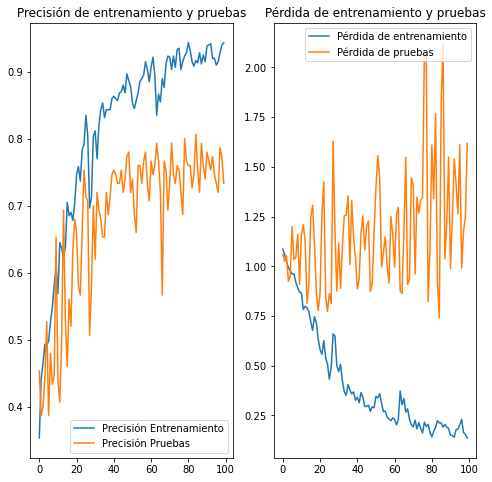

In [29]:
#Graficas de precisión
acc = historial.history['accuracy']
val_acc = historial.history['val_accuracy']

loss = historial.history['loss']
val_loss = historial.history['val_loss']

rango_epocas = range(epocas)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(rango_epocas, acc, label='Precisión Entrenamiento')
plt.plot(rango_epocas, val_acc, label='Precisión Pruebas')
plt.legend(loc='lower right')
plt.title('Precisión de entrenamiento y pruebas')

plt.subplot(1,2,2)
plt.plot(rango_epocas, loss, label='Pérdida de entrenamiento')
plt.plot(rango_epocas, val_loss, label='Pérdida de pruebas')
plt.legend(loc='upper right')
plt.title('Pérdida de entrenamiento y pruebas')
plt.show()

In [30]:
#Exportar el modelo en formato h5
modelo.save('granadilla.h5')
!ls
!pip install tensorflowjs
!mkdir carpeta_salida
!tensorflowjs_converter --input_format keras granadilla.h5 carpeta_salida
!ls carpeta_salida

drive  granadilla.h5  sample_data
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 83 kB 2.0 MB/s 
     |████████████████████████████████| 16.0 MB 9.7 MB/s 
     |████████████████████████████████| 40 kB 7.0 MB/s 
     |████████████████████████████████| 578.0 MB 18 kB/s 
     |████████████████████████████████| 185 kB 71.7 MB/s 
     |████████████████████████████████| 237 kB 70.8 MB/s 
     |████████████████████████████████| 145 kB 75.5 MB/s 
     |████████████████████████████████| 51 kB 8.7 MB/s 
     |████████████████████████████████| 1.7 MB 50.4 MB/s 
     |████████████████████████████████| 5.9 MB 33.4 MB/s 
     |████████████████████████████████| 438 kB 73.2 MB/s 
     |████████████████████████████████| 85 kB 5.1 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalle

2022-11-11 18:09:53.309346: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-11 18:09:54.007935: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2022-11-11 18:09:54.008130: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2022-11-11 18:09:54.008151: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed p